In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
va_filtered_listings = pd.read_csv("va_filtered_listings.csv")

# Display the first few rows
va_filtered_listings.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,5/1/2019,7/31/2019,90,zip code,2,9670,f,Zip Code: 24244,NaN,Virginia,...,0.100000,NaN,NaN,NaN,0.100000,0.000000,0.100000,"Kingsport, TN",28700,2/10/2025 14:21
1,6/1/2022,8/31/2022,90,zip code,2,9223,f,Zip Code: 23235,NaN,Virginia,...,0.037794,NaN,NaN,NaN,0.680272,-0.059373,-0.023216,"Richmond, VA",40060,2/10/2025 14:21
2,9/1/2024,11/30/2024,90,zip code,2,9824,f,Zip Code: 24563,NaN,Virginia,...,-0.716667,NaN,NaN,NaN,0.375000,-0.069444,0.000000,"Danville, VA",19260,2/10/2025 14:21
3,8/1/2018,10/31/2018,90,zip code,2,7894,f,Zip Code: 20187,NaN,Virginia,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC",47894,2/10/2025 14:21
4,11/1/2022,1/31/2023,90,zip code,2,9224,f,Zip Code: 23236,NaN,Virginia,...,-0.084934,NaN,NaN,NaN,0.452830,-0.032464,-0.188679,"Richmond, VA",40060,2/10/2025 14:21


In [21]:
# Ensure 'period_begin' is a datetime object
va_filtered_listings['period_begin'] = pd.to_datetime(va_filtered_listings['period_begin'], errors='coerce')


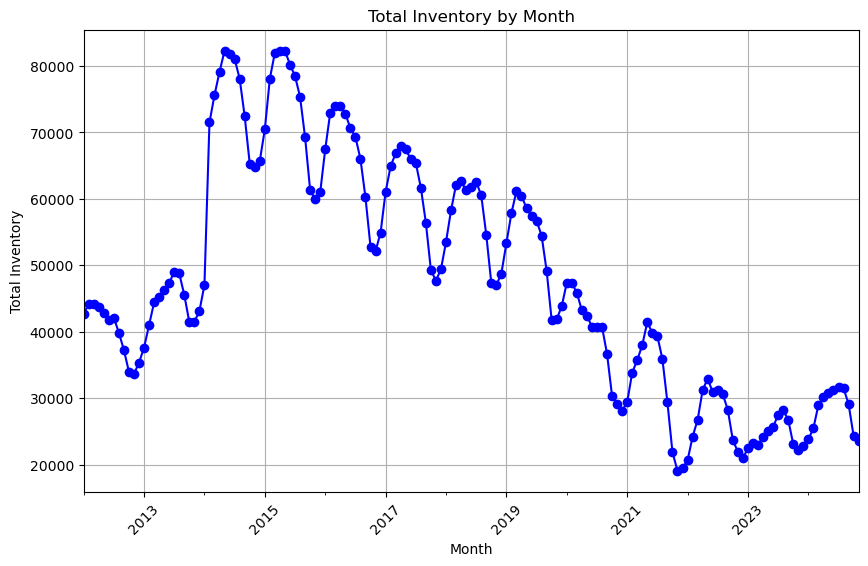

In [4]:
# Group by month and sum the inventory
va_filtered_listings['month'] = va_filtered_listings['period_begin'].dt.to_period('M')
inventory_monthly = va_filtered_listings.groupby('month')['inventory'].sum()

# Plot
plt.figure(figsize=(10, 6))
inventory_monthly.plot(kind='line', marker='o', color='b')
plt.title('Total Inventory by Month')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

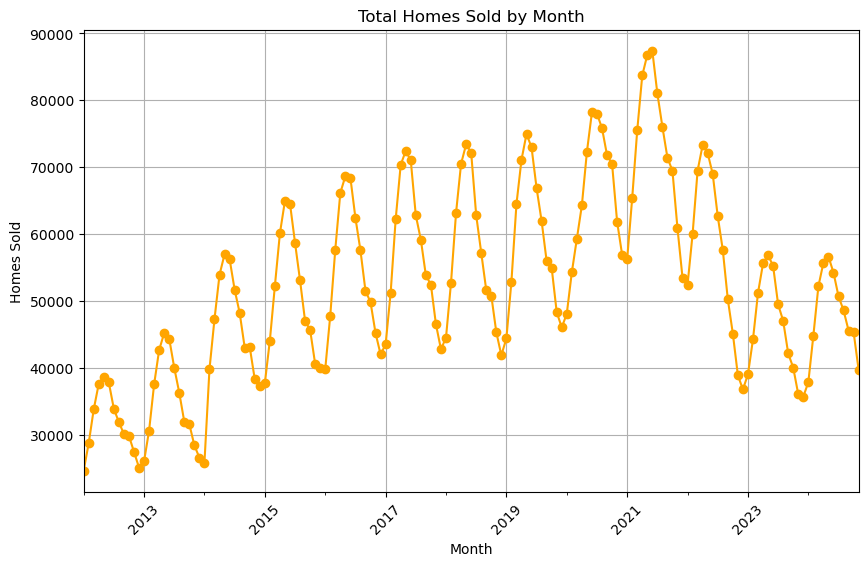

In [7]:
# Group by month and sum the homes sold
homes_sold_monthly = va_filtered_listings.groupby('month')['homes_sold'].sum()

# Plot
plt.figure(figsize=(10, 6))
homes_sold_monthly.plot(kind='line', marker='o', color='orange')
plt.title('Total Homes Sold by Month')
plt.xlabel('Month')
plt.ylabel('Homes Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

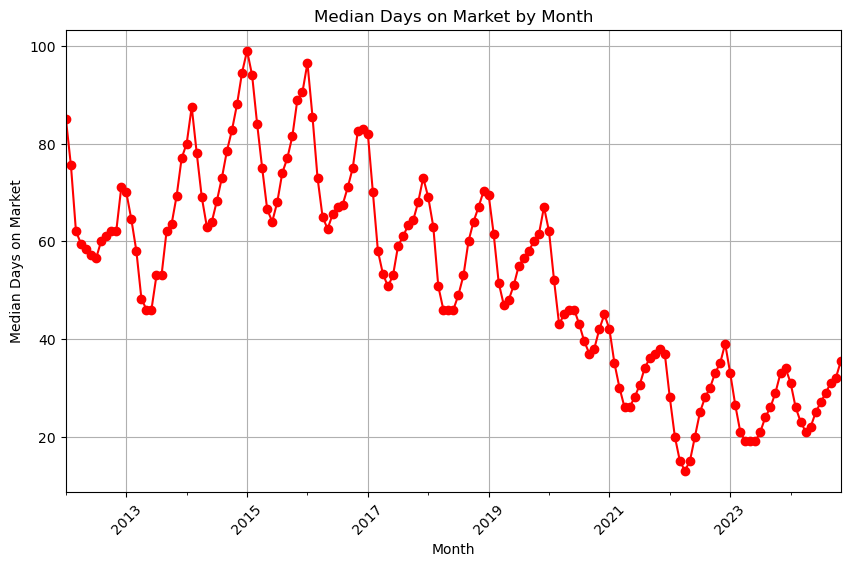

In [8]:
# Group by month and calculate the median days on market
median_dom_monthly = va_filtered_listings.groupby('month')['median_dom'].median()

# Plot
plt.figure(figsize=(10, 6))
median_dom_monthly.plot(kind='line', marker='o', color='r')
plt.title('Median Days on Market by Month')
plt.xlabel('Month')
plt.ylabel('Median Days on Market')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

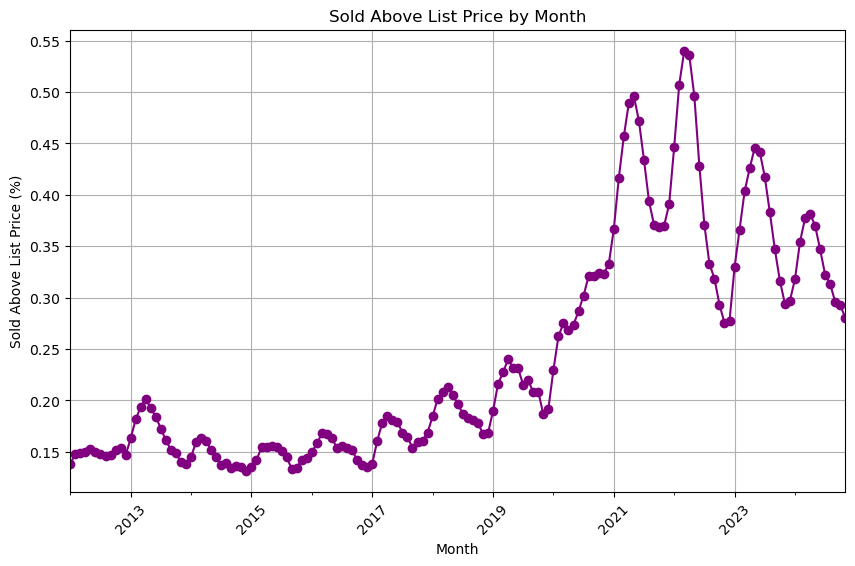

In [9]:
# Group by month and calculate the average sold above list price percentage
sold_above_list_monthly = va_filtered_listings.groupby('month')['sold_above_list'].mean()

# Plot
plt.figure(figsize=(10, 6))
sold_above_list_monthly.plot(kind='line', marker='o', color='purple')
plt.title('Sold Above List Price by Month')
plt.xlabel('Month')
plt.ylabel('Sold Above List Price (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

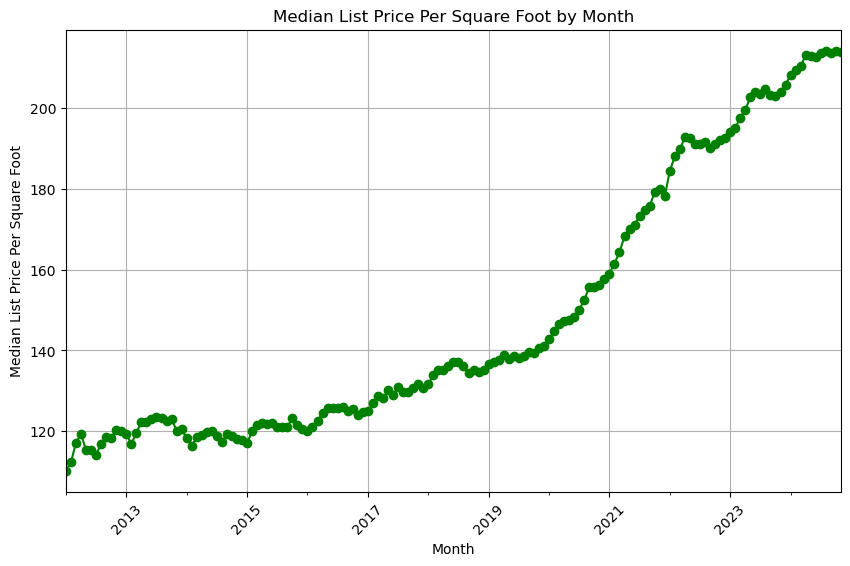

In [10]:
# Group by month and calculate the median list price per square foot
median_ppsf_monthly = va_filtered_listings.groupby('month')['median_ppsf'].median()

# Plot
plt.figure(figsize=(10, 6))
median_ppsf_monthly.plot(kind='line', marker='o', color='green')
plt.title('Median List Price Per Square Foot by Month')
plt.xlabel('Month')
plt.ylabel('Median List Price Per Square Foot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

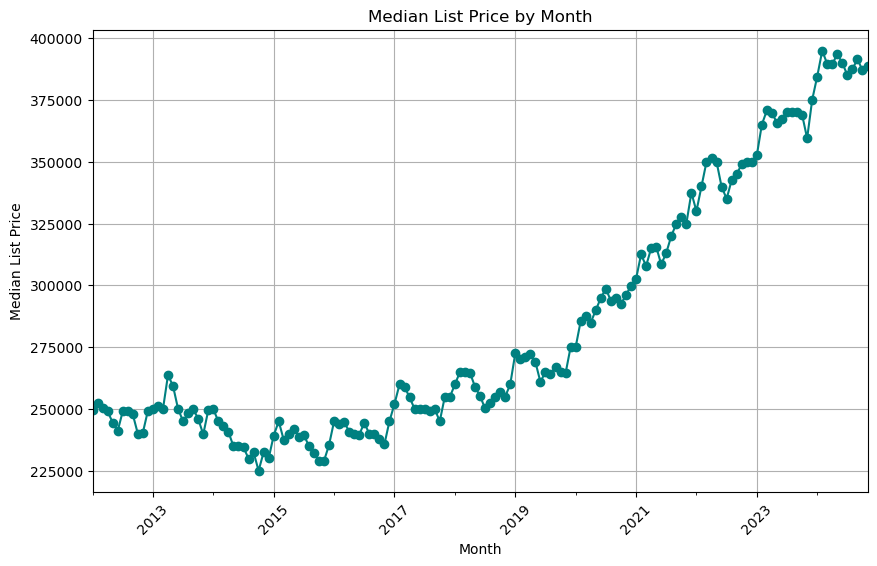

In [11]:
# Group by month and calculate the median list price
median_list_price_monthly = va_filtered_listings.groupby('month')['median_list_price'].median()

# Plot
plt.figure(figsize=(10, 6))
median_list_price_monthly.plot(kind='line', marker='o', color='teal')
plt.title('Median List Price by Month')
plt.xlabel('Month')
plt.ylabel('Median List Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


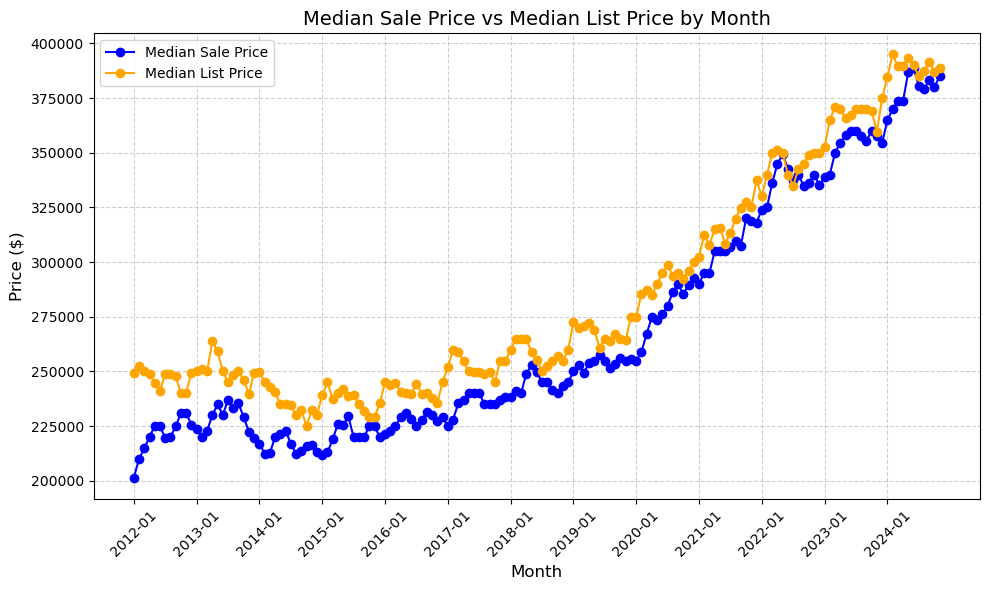

In [12]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Plot
plt.figure(figsize=(10, 6))

# Plot Median Sale Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b')

# Plot Median List Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='orange')

# Add titles and labels
plt.title('Median Sale Price vs Median List Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(median_prices_monthly), 12), labels=median_prices_monthly.index.astype(str)[::12])

# Show legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

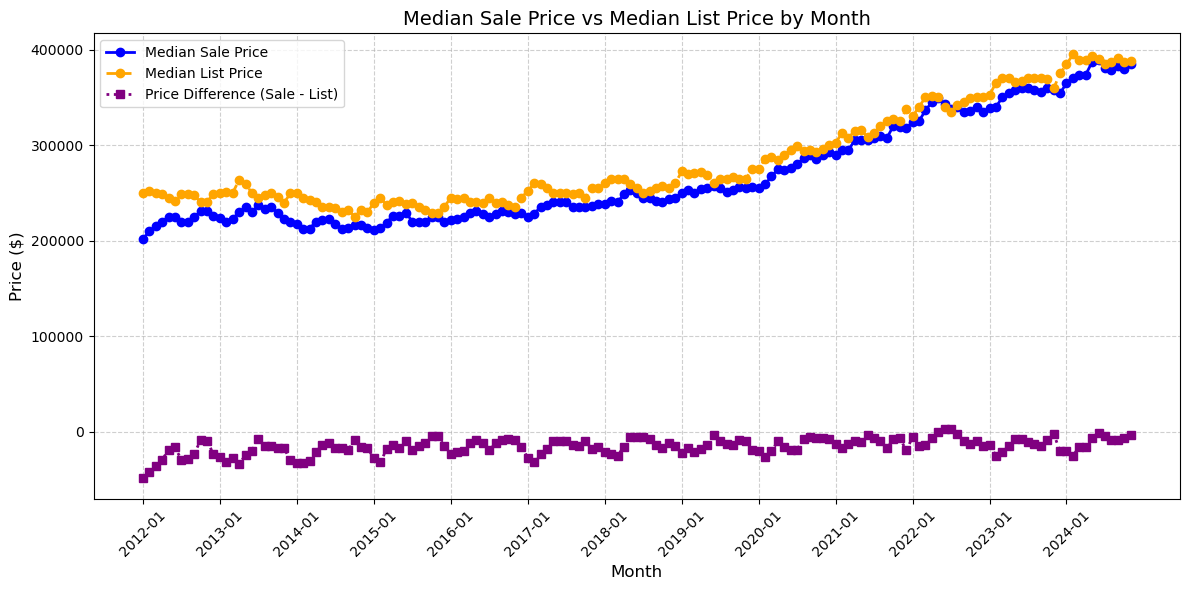

In [13]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Create a new column for the price difference between sale and list price
median_prices_monthly['price_diff'] = median_prices_monthly['median_sale_price'] - median_prices_monthly['median_list_price']

# Plot
plt.figure(figsize=(12, 6))

# Plot Median Sale Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b', linestyle='-', linewidth=2)

# Plot Median List Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='orange', linestyle='--', linewidth=2)

# Plot Price Difference
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['price_diff'], label='Price Difference (Sale - List)', marker='s', color='purple', linestyle=':', linewidth=2)

# Add titles and labels
plt.title('Median Sale Price vs Median List Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(median_prices_monthly), 12), labels=median_prices_monthly.index.astype(str)[::12])

# Show legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

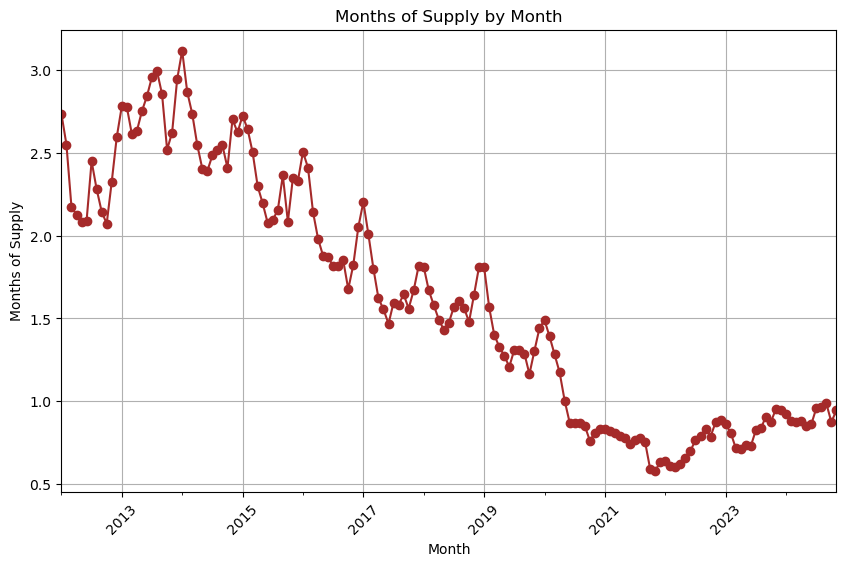

In [15]:
# Group by month and calculate months of supply (inventory / homes sold)
va_filtered_listings['months_of_supply'] = va_filtered_listings['inventory'] / va_filtered_listings['homes_sold']
months_of_supply_monthly = va_filtered_listings.groupby('month')['months_of_supply'].mean()

# Plot
plt.figure(figsize=(10, 6))
months_of_supply_monthly.plot(kind='line', marker='o', color='brown')
plt.title('Months of Supply by Month')
plt.xlabel('Month')
plt.ylabel('Months of Supply')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

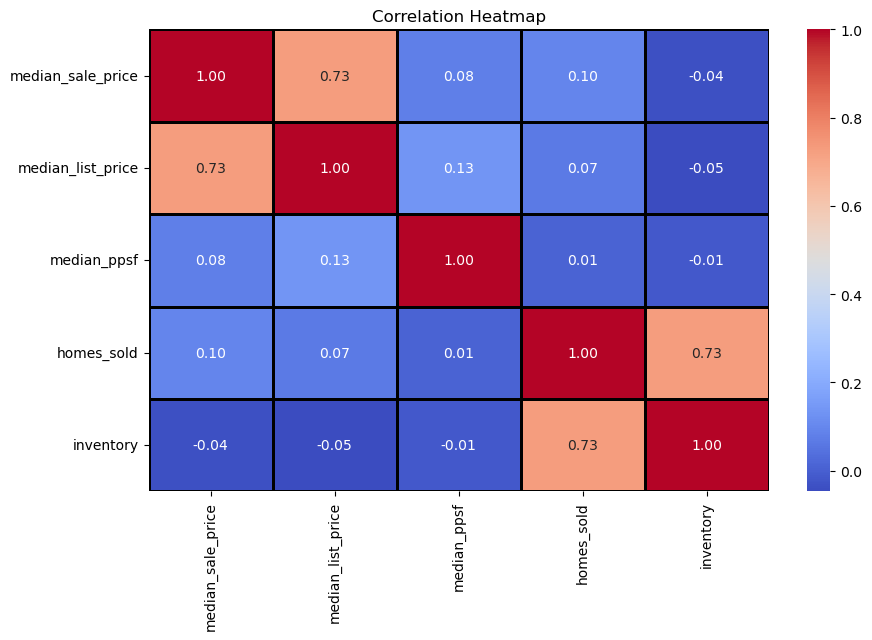

In [16]:
# Compute the correlation matrix
correlation_matrix = va_filtered_listings[['median_sale_price', 'median_list_price', 'median_ppsf', 'homes_sold', 'inventory']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
#sns.pairplot(va_filtered_listings[['median_sale_price', 'median_list_price', 'median_ppsf', 'homes_sold']])
#plt.suptitle('Pairplot of Price-Related Variables', y=1.02)
#plt.show()